In [1]:
import pickle

with open("DATA_seconds_bal_xy_tt.pkl", "rb") as f:
    x_train, x_test, y_train, y_test, classes = pickle.load(f)

In [2]:
import numpy as np
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-07-08 14:48:41.850413: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-08 14:48:42.149300: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 14:48:43.023821: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2024-07-08 14:48:44.232032: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:48:44.512704: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:48:44.512742: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
import matplotlib.pyplot as plt
def plotaccloss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(14, 6))

    # Plotting training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r*-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the input data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [5]:
nout=len(classes)

In [6]:
from keras.models import Sequential
from keras.layers import Input,Dense, LSTM, Bidirectional, Reshape, GRU,Dropout,BatchNormalization

# Define the model
model = Sequential()
model.add(Input(shape=(15360,)))
model.add(Reshape((30, 512)))

# LSTM layers
# model.add(Bidirectional(LSTM(256)))
model.add(LSTM(256))

# Dense layer
model.add(Dense(32, activation='relu', kernel_regularizer='l1'))
model.add(Dropout(0.2))

model.add(Dense(nout, activation='softmax'))

if nout==2:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summarize the model
# model.summary()

2024-07-08 14:48:49.826486: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:48:49.827201: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:48:49.827241: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:48:50.141240: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:48:50.141832: I external/local_xla/xla/stream_executor

Epoch 1/30


2024-07-08 14:49:00.133238: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4182 - loss: 3.5705 - val_accuracy: 0.4796 - val_loss: 1.0938
Epoch 2/30
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4526 - loss: 1.0929 - val_accuracy: 0.4969 - val_loss: 1.0492
Epoch 3/30
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5104 - loss: 1.0381 - val_accuracy: 0.4949 - val_loss: 1.0415
Epoch 4/30
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5025 - loss: 1.0279 - val_accuracy: 0.5130 - val_loss: 1.0202
Epoch 5/30
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5272 - loss: 0.9933 - val_accuracy: 0.4906 - val_loss: 1.0653
Epoch 6/30
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5457 - loss: 0.9915 - val_accuracy: 0.5071 - val_loss: 1.0253
Epoch 7/30
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5714 - loss: 0.9453 - val_accuracy: 0.5122 - val_loss: 1.0381
Epoch 8/30
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5917 - loss: 0.9185 - val_accuracy: 0.5118 - va

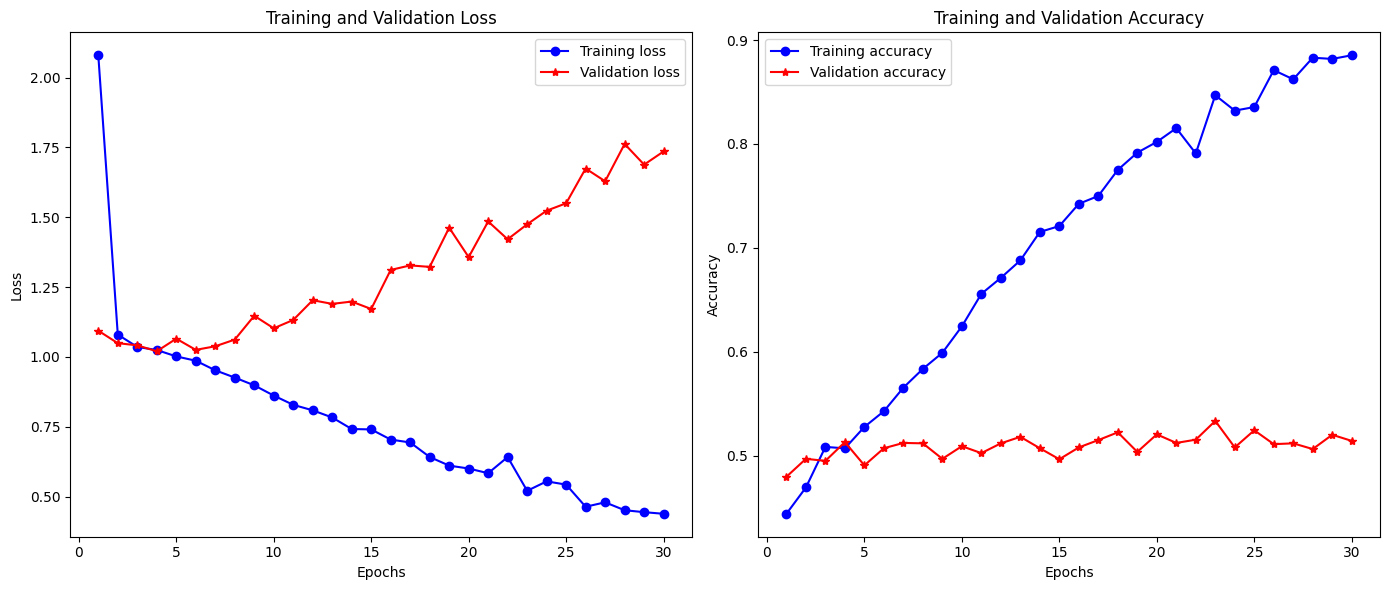

In [7]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)
plotaccloss(history)

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5248 - loss: 1.7150
Test Accuracy: 0.5350


In [9]:
y_pred_prob = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Figure size 1000x800 with 0 Axes>

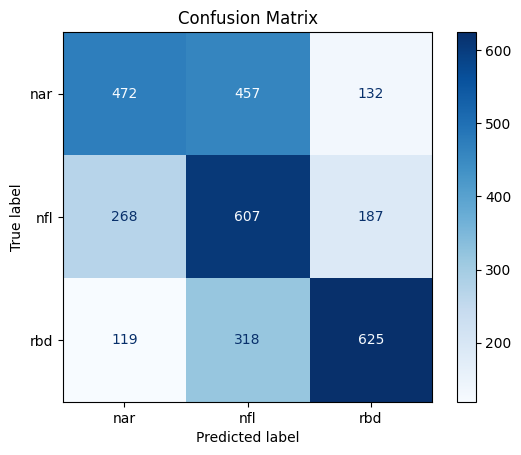

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()